In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('house_data.csv')
df

,price,surface,arrondissement
0,1820,46.10,1.0
1,1750,41.00,1.0
2,1900,55.00,1.0
3,1950,46.00,1.0
4,1950,49.00,1.0
...,...,...,...
822,850,35.00,10.0
823,700,10.00,10.0
824,1280,34.00,10.0
825,1545,65.00,10.0


<Axes: >

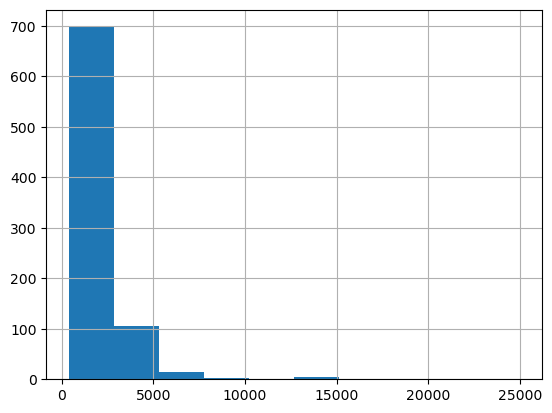

In [7]:
df['price'].hist()

## Split and create testing set

<Axes: >

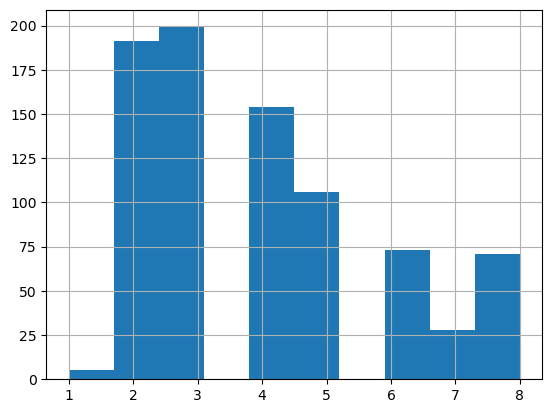

In [12]:
df["price_cat"] = pd.cut(df["price"], bins=[0., 500, 1000, 1500, 2000., 2500, 3000, 3500, np.inf], labels=[1, 2, 3, 4, 5, 6, 7, 8]) 
df["price_cat"].hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.5,
random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(df, df["price_cat"]):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [16]:
strat_bias = strat_test_set_n["price_cat"].value_counts() / len(strat_test_set_n)
strat_bias

3    0.241546
2    0.231884
4    0.185990
5    0.128019
6    0.089372
8    0.084541
7    0.033816
1    0.004831
Name: price_cat, dtype: float64

In [17]:
data_prop = df["price_cat"].value_counts() / len (df)
data_prop

3    0.240629
2    0.230955
4    0.186215
5    0.128174
6    0.088271
8    0.085852
7    0.033857
1    0.006046
Name: price_cat, dtype: float64

In [47]:
df_test = strat_train_set_n.copy()
df_test['surface'].fillna(df_test['surface'].mean(), inplace=True)

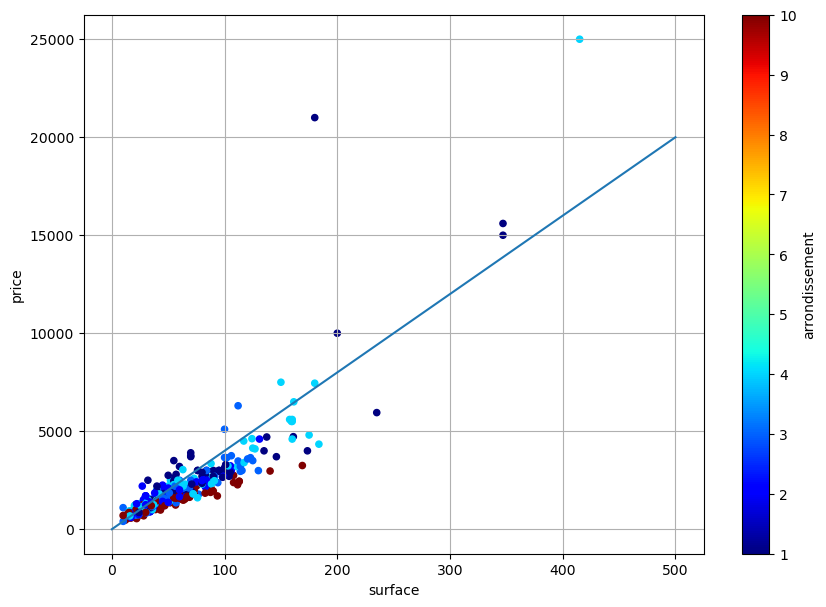

In [57]:
df_test.plot(kind="scatter", x="surface", y="price", grid=True, 
             c= "arrondissement", cmap = "jet", colorbar= True, legend=True, sharex= False, figsize=(10, 7) ) 
plt.plot(np.linspace(0,500,1000), 40*np.linspace(0,500,1000))

In [56]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = df_test.surface.values.reshape(-1, 1)
y = df_test.price.values
regr.fit(X, y)
regr.coef_

array([39.69752247])

In [60]:
regr.score(X,y)

0.7456586658691022

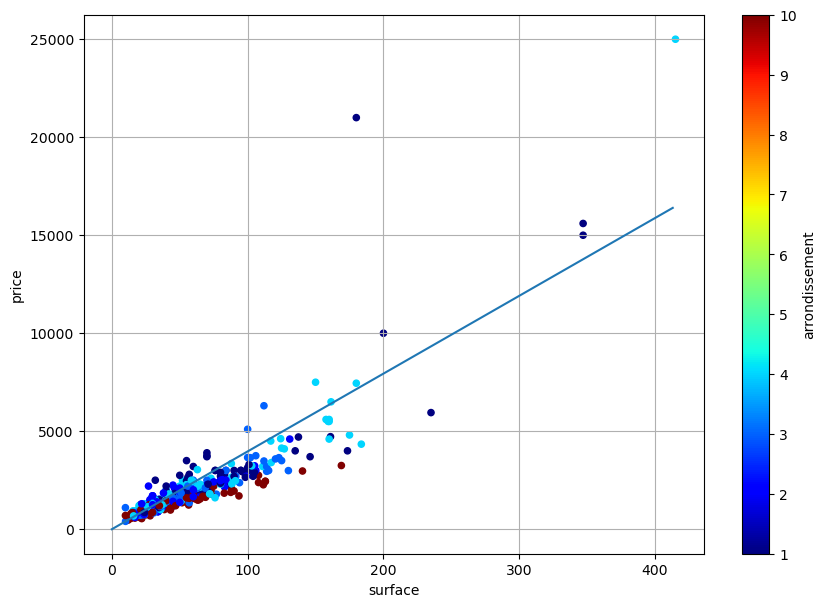

In [59]:
df_test.plot(kind="scatter", x="surface", y="price", grid=True, 
             c= "arrondissement", cmap = "jet", colorbar= True, legend=True, sharex= False, figsize=(10, 7) ) 
plt.plot(np.linspace(0,np.shape(df_test)[0],1000), regr.coef_*np.linspace(0,np.shape(df_test)[0],1000));